# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [228]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01   -0.179791
2021-01-02   -1.828994
2021-01-03   -0.800110
2021-01-04    1.899579
2021-01-05    0.989253
                ...   
2021-12-27    0.862971
2021-12-28    0.404257
2021-12-29    0.484221
2021-12-30    2.000983
2021-12-31    0.723763
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

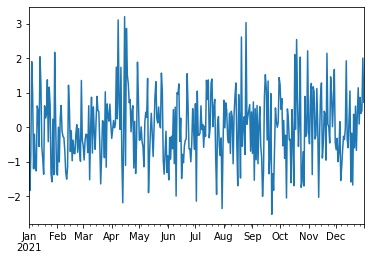

In [229]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

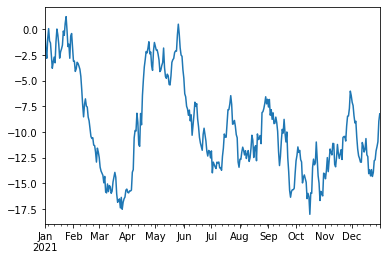

In [230]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

## Histograms

In [231]:
# make a dataframe from the Series
df = ts.to_frame()
df.head()

,vals
2021-01-01,-0.179791
2021-01-02,-2.008785
2021-01-03,-2.808895
2021-01-04,-0.909316
2021-01-05,0.079936


In [232]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df.reset_index()
df

,index,vals
0,2021-01-01,-0.179791
1,2021-01-02,-2.008785
2,2021-01-03,-2.808895
3,2021-01-04,-0.909316
4,2021-01-05,0.079936
...,...,...
360,2021-12-27,-11.832507
361,2021-12-28,-11.428249
362,2021-12-29,-10.944028
363,2021-12-30,-8.943045


In [233]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,vals
0,2021-01-01,-0.179791
1,2021-01-02,-2.008785
2,2021-01-03,-2.808895
3,2021-01-04,-0.909316
4,2021-01-05,0.079936
...,...,...
360,2021-12-27,-11.832507
361,2021-12-28,-11.428249
362,2021-12-29,-10.944028
363,2021-12-30,-8.943045


In [234]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [235]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,vals,month
310,2021-11-07,-11.647401,2021-11
27,2021-01-28,-2.808444,2021-01
193,2021-07-13,-12.358970,2021-07
84,2021-03-26,-17.512095,2021-03
75,2021-03-17,-14.371384,2021-03


In [236]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,vals
,sum
month,
1,-42.895561
2,-213.080180
3,-477.659131
4,-234.981846
5,-91.610176
6,-280.319382
7,-343.049603
8,-331.779680


<AxesSubplot:xlabel='month'>

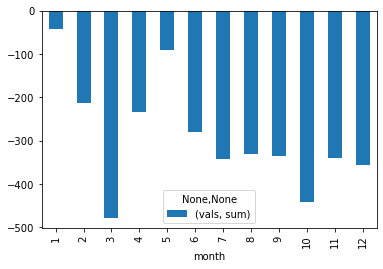

In [237]:
#plot the data
g.plot.bar(y=['vals']) # the index will serve as the x axis, by default

## Data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [238]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
250,458418,CONSUMER AFFAIRS,Internal,1,CRM Solutions Specialist,COMPUTER SPECIALIST (SOFTWARE),Competitive-1,13632,04,"Technology, Data & Innovation",...,NaN,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,NaN,New York City Residency is not required for th...,02/17/2021,18-APR-2021,02/17/2021,04/13/2021
1064,455903,DEPARTMENT OF CORRECTION,Internal,1,Director of Legislative Affairs,AGENCY ATTORNEY,Non-Competitive-5,30087,04,"Policy, Research & Analysis",...,NaN,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,12/28/2020,NaN,12/28/2020,04/13/2021
323,459255,OFFICE OF MANAGEMENT & BUDGET,Internal,1,Analyst FEMA Public Assistance Fiscal,BUDGET ANALYST (OMB),Pending Classification-2,06088,01,"Finance, Accounting, & Procurement Policy, Res...",...,"REQUIREMENTS: Assistant Analyst ($46,856+): B...","For City employees, please go to Employee Self...",NaN,255 Greenwich Street,NaN,New York City residency is generally required ...,03/09/2021,NaN,03/09/2021,04/13/2021


In [239]:
# group jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.sample(3)

,Job ID,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Recruitment Contact,Posting Date,Posting Updated,Process Date
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Agency,,,,,,,,,,,,,,,,,,
CONSUMER AFFAIRS,15595982,InternalInternalExternalInternalInternalExtern...,34,Senior InspectorCommunity Affairs AssociateSen...,INSPECTOR (CONSUMER AFFAIRS)COMMUNITY COORDINA...,Competitive-1Non-Competitive-5Competitive-1Non...,3399556058339951020930087128591003313224609101...,0200020101M4M20000000401M20202M401010201000202...,1.842588e+06,2.346088e+06,AnnualAnnualAnnualHourlyAnnualAnnualAnnualAnnu...,"42 Broadway, N.Y.42 Broadway, N.Y.42 Broadway,...",Manhattan/Si EnforcementExternal AffairsManha...,The NYC Department of Consumer and Worker Prot...,0.0,02/26/202102/25/202102/26/202103/26/202103/02/...,02/26/202102/25/202102/26/202103/26/202103/09/...,04/13/202104/13/202104/13/202104/13/202104/13/...
ADMIN TRIALS AND HEARINGS,1798308,InternalExternalInternalExternal,4,Richard C. Failla OATH Law Clerk FellowshipRic...,AGENCY ATTORNEY INTERNEAGENCY ATTORNEY INTERNE...,Non-Competitive-5Non-Competitive-5Competitive-...,30086300861025110251,00000202,6.576831e+04,7.562231e+04,HourlyHourlyAnnualAnnual,"100 Church St., N.Y.100 Church St., N.Y.66 Joh...",Trial DivisionTrial DivisionHearing Division M...,JOB DESCRIPTION The City of New Yorkâs Offi...,0.0,02/17/202102/17/202101/28/202101/28/2021,02/17/202102/17/202101/28/202101/28/2021,04/13/202104/13/202104/13/202104/13/2021
DEPARTMENT OF TRANSPORTATION,5410739,InternalExternalExternalInternalInternalExtern...,14,Supv. Bridge Repairer & RiveterDeputy General ...,SUPERVISOR BRIDGE REPAIRER ANDEXECUTIVE AGENCY...,Competitive-1Non-Competitive-5Competitive-1Com...,9237295005920051002656058560581005A202151002D9...,00M500M20000000300M50003,6.310594e+05,1.381374e+06,DailyAnnualDailyAnnualAnnualAnnualAnnualAnnual...,55 Water St Ny Ny55 Water St Ny Ny88-26 Pitkin...,Bridge Repair/FlagsLegal AffairsFacilities Mai...,"Under general supervision, supervises a crew o...",0.0,10/30/202008/21/202002/18/202109/30/202008/04/...,03/30/202108/21/202002/19/202110/05/202002/12/...,04/13/202104/13/202104/13/202104/13/202104/13/...


<AxesSubplot:ylabel='Agency'>

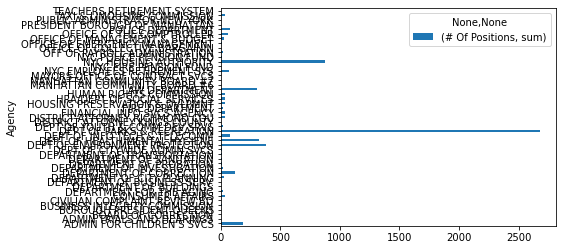

In [240]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

<AxesSubplot:ylabel='Agency'>

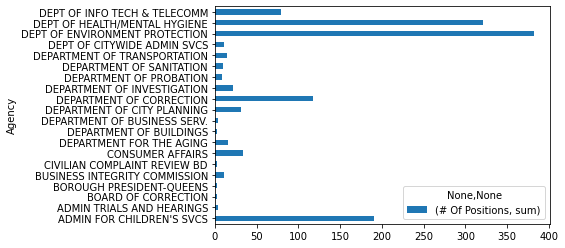

In [247]:
# perhaps limit to just the first 20 agencies!
g[ : 20].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

In [248]:
g2 = g.sort_values(by='# Of Positions')

ValueError: The column label '# Of Positions' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.